In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [23]:
PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)

# sns.heatmap(df.corr(),annot=True)
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []


In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
predicted_values

array(['coffee', 'pomegranate', 'pomegranate', 'cotton', 'mungbean',
       'coffee', 'watermelon', 'coconut', 'pigeonpeas', 'mango',
       'chickpea', 'jute', 'papaya', 'lentil', 'mango', 'maize', 'orange',
       'blackgram', 'cotton', 'orange', 'banana', 'pigeonpeas',
       'muskmelon', 'banana', 'mango', 'pigeonpeas', 'coconut', 'coconut',
       'jute', 'mungbean', 'pomegranate', 'chickpea', 'mungbean',
       'mungbean', 'blackgram', 'coffee', 'cotton', 'muskmelon',
       'blackgram', 'blackgram', 'papaya', 'pomegranate', 'pomegranate',
       'jute', 'blackgram', 'pomegranate', 'pomegranate', 'mungbean',
       'coffee', 'chickpea', 'coffee', 'blackgram', 'cotton',
       'pigeonpeas', 'cotton', 'lentil', 'mungbean', 'banana', 'lentil',
       'orange', 'coconut', 'jute', 'pigeonpeas', 'grapes', 'pigeonpeas',
       'grapes', 'grapes', 'pomegranate', 'coffee', 'maize', 'apple',
       'orange', 'chickpea', 'mango', 'banana', 'maize', 'banana', 'jute',
       'pomegranate', 'm

In [25]:
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

DecisionTrees's Accuracy is:  90.0


In [26]:
classification_report(Ytest,predicted_values)

'              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        13\n      banana       1.00      1.00      1.00        17\n   blackgram       0.59      1.00      0.74        16\n    chickpea       1.00      1.00      1.00        21\n     coconut       0.91      1.00      0.95        21\n      coffee       1.00      1.00      1.00        22\n      cotton       1.00      1.00      1.00        20\n      grapes       1.00      1.00      1.00        18\n        jute       0.74      0.93      0.83        28\n kidneybeans       0.00      0.00      0.00        14\n      lentil       0.68      1.00      0.81        23\n       maize       1.00      1.00      1.00        21\n       mango       1.00      1.00      1.00        26\n   mothbeans       0.00      0.00      0.00        19\n    mungbean       1.00      1.00      1.00        24\n   muskmelon       1.00      1.00      1.00        23\n      orange       1.00      1.00      1.00        29\n      p

In [27]:
score = cross_val_score(DecisionTree, features, target,cv=5)
print('Score:',score)

Score: [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [28]:
data = np.array([[99,38,21,22.88330922,71.59722446,6.352471866,67.72777298]])
prediction = DecisionTree.predict(data)
print('Test Prediction:',prediction)

Test Prediction: ['maize']


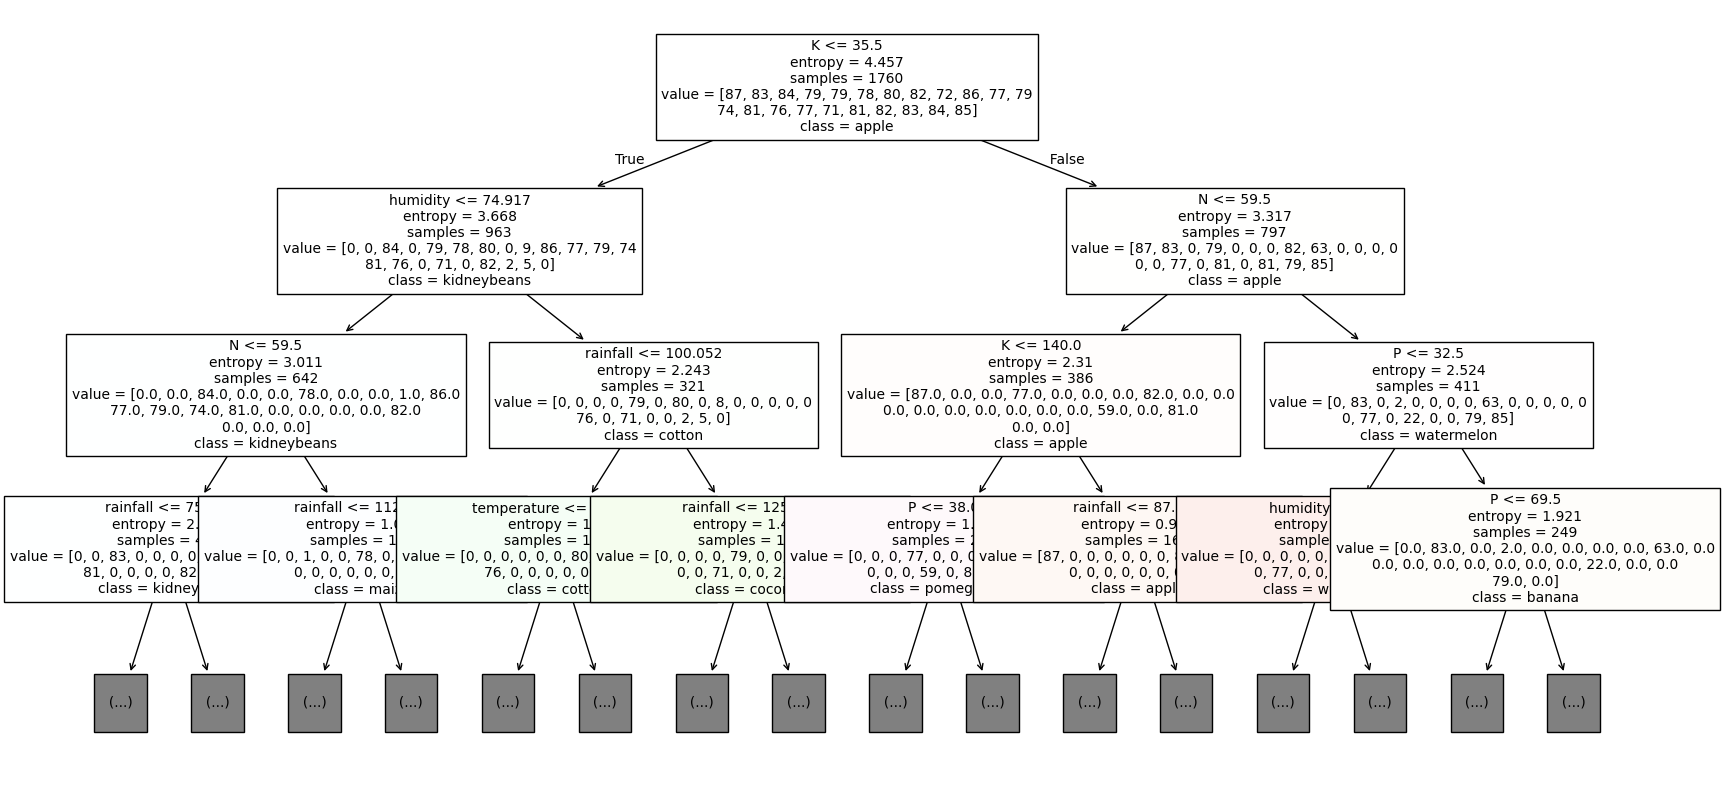

In [29]:
plt.figure(figsize=(20,10))
plot_tree(DecisionTree, feature_names=features.columns, class_names=DecisionTree.classes_, filled=True, fontsize=10, max_depth=3)
plt.show()


In [30]:
tree_rules = export_text(DecisionTree, feature_names=features.columns)

# Replace class labels with crop names
for i, crop in enumerate(DecisionTree.classes_):
    tree_rules = tree_rules.replace(f"class: {i}", f"class: {crop}")

print(tree_rules)

|--- K <= 35.50
|   |--- humidity <= 74.92
|   |   |--- N <= 59.50
|   |   |   |--- rainfall <= 75.18
|   |   |   |   |--- rainfall <= 59.73
|   |   |   |   |   |--- class: lentil
|   |   |   |   |--- rainfall >  59.73
|   |   |   |   |   |--- class: blackgram
|   |   |   |--- rainfall >  75.18
|   |   |   |   |--- P <= 47.50
|   |   |   |   |   |--- class: mango
|   |   |   |   |--- P >  47.50
|   |   |   |   |   |--- class: pigeonpeas
|   |   |--- N >  59.50
|   |   |   |--- rainfall <= 112.19
|   |   |   |   |--- temperature <= 29.21
|   |   |   |   |   |--- class: maize
|   |   |   |   |--- temperature >  29.21
|   |   |   |   |   |--- class: blackgram
|   |   |   |--- rainfall >  112.19
|   |   |   |   |--- P <= 47.00
|   |   |   |   |   |--- class: coffee
|   |   |   |   |--- P >  47.00
|   |   |   |   |   |--- class: jute
|   |--- humidity >  74.92
|   |   |--- rainfall <= 100.05
|   |   |   |--- temperature <= 26.49
|   |   |   |   |--- class: cotton
|   |   |   |--- temperatur

<Axes: >

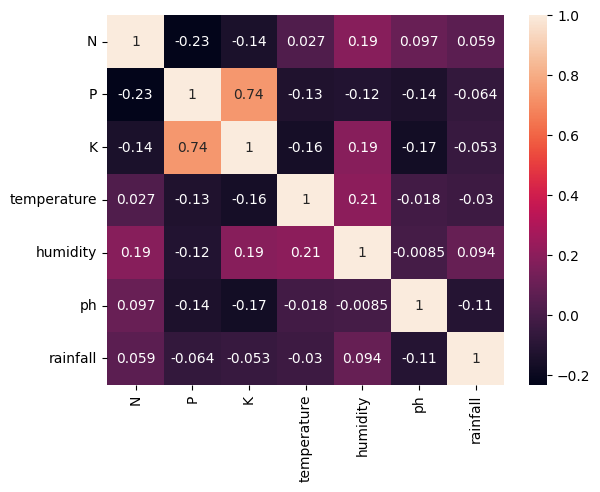

In [31]:
sns.heatmap(features.corr(),annot=True)

In [32]:
SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

SVM's Accuracy is:  10.681818181818182


In [33]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.07        29
      papaya       1.00    

In [40]:
data = np.array([[99,38,21,22.88330922,71.59722446,6.352471866,67.72777298]])
prediction = SVM.predict(data)
print('Test Prediction:',prediction)

Test Prediction: ['maize']


In [34]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Gaussian Naive Bayes')
print("Gaussian Naive Bayes's Accuracy is: ", x*100)

Gaussian Naive Bayes's Accuracy is:  99.0909090909091


In [35]:
print(classification_report(Ytest,predicted_values))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [41]:
data = np.array([[99,38,21,22.88330922,71.59722446,6.352471866,67.72777298]])
prediction = NaiveBayes.predict(data)
print('Test Prediction:',prediction)

Test Prediction: ['maize']


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

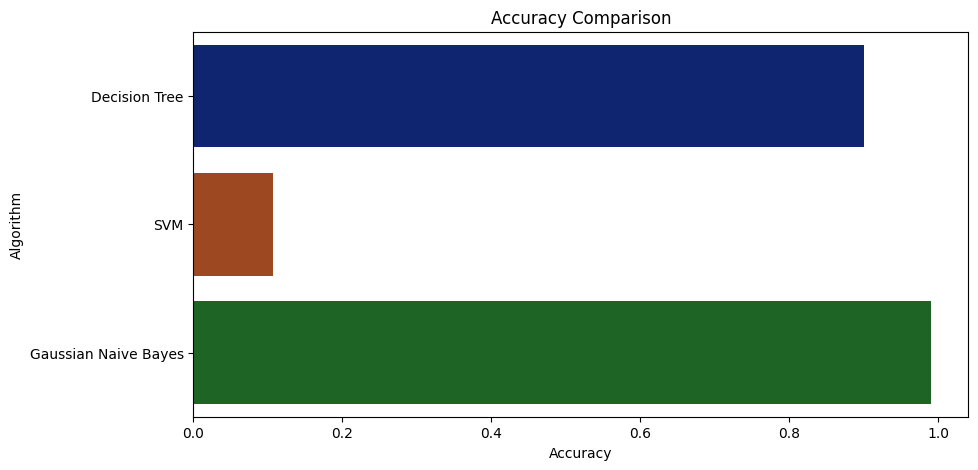

In [38]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')